# Load the data

In [1]:
import numpy as np
import pandas as pd
import os
 
data = [] 
# get csv file p0-9.csv

# from folder all_digits take each csv file using pandas
for i in range(10):
    data.append(pd.read_csv(f'./all_digits/p{i}.csv', header=None))
    

In [2]:
data[0].shape

(1024, 1)

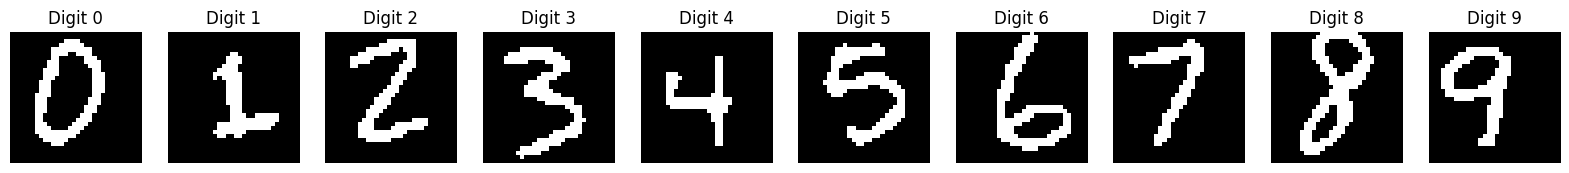

In [3]:
data_reshaped = [d.values.reshape(-1, 32, 32) for d in data]   


# Show the first image of each digit
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axs[i].imshow(data_reshaped[i][0].T, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Digit {i}')


Step number: 0
Step number: 1
Pattern converged after 1 steps


Text(0.5, 1.0, 'Recovered pattern')

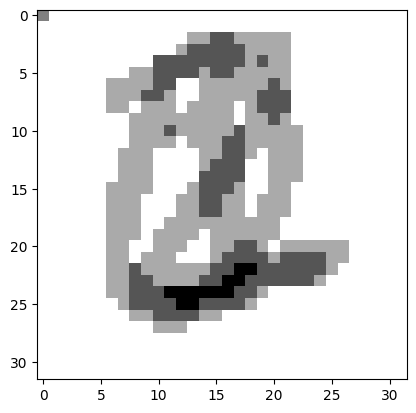

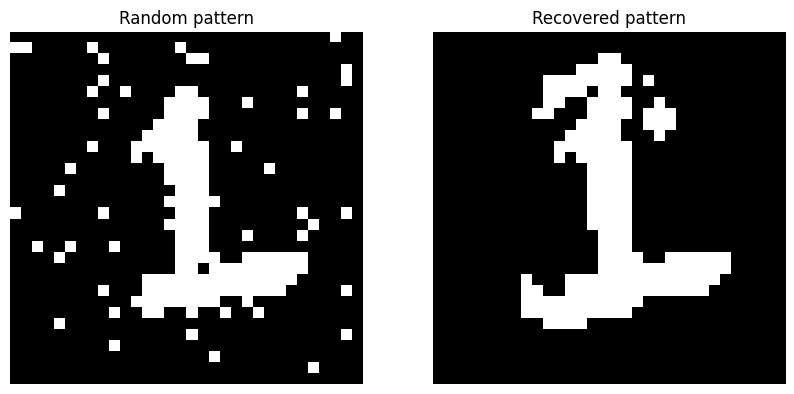

In [6]:
from HopfieldNetwork import *
from distort_image import *

# Create a Hopefield network for each digit training is embedded in init
# give to the hopefiled no reshaped data
#hopfield_networks = [HopefieldNet(d) for d in data_reshaped]

# Give to the net the first 3 digits
hopfield_network = HopfieldNet(data_reshaped[0:3], dimension=len(data[0]))
noise = 0.05
# Create a random pattern
random_pattern = distort_image(data_reshaped[1][0], noise)
random_pattern_show = distort_image(data_reshaped[1][0], noise)

# mask the image instead of noise

# recover the random pattern with the first digit
# feed the pattern only with an arrray of 1 and -1
recovered_random_pattern, energy, overlap, frames = hopfield_network.recall(random_pattern.reshape(-1, 1),
                                                                            steps=100, dimension=len(data[0]), bias=0.7,
                                                                            by_frame=True, compute_energy=True)

# show weights for the first digit
plt.imshow(hopfield_network.weights[0].reshape(32, 32).T, cmap='gray')

# Show the recovered pattern before and after
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(random_pattern_show.reshape(32, 32).T, cmap='gray')
axs[1].imshow(recovered_random_pattern.reshape(32, 32).T, cmap='gray')

axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('Random pattern')
axs[1].set_title('Recovered pattern')




In [7]:
len(frames)

2048

## Setting up a GIF to show the data

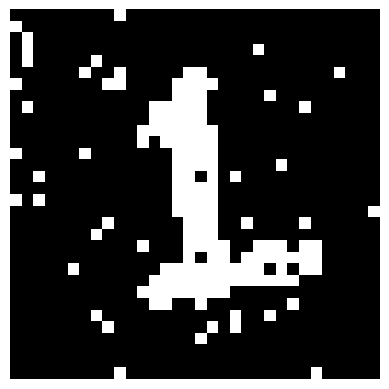

In [8]:
len(frames)

# frames is a list of patterns that the network goes through during the recall process,
# show trough a gif or video the frames with frame rate of 30 frame per second

import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
ax.axis('off')
im = ax.imshow(frames[0].reshape(32, 32).T, cmap='gray')

def update(i):
    # add iteration number while showing the image animated
    im.set_array(frames[i].reshape(32, 32).T)
    return im,
# do it at 60 fps since we have 7000k frames
ani = FuncAnimation(fig, update, frames=len(frames), interval=1000/60)

#ani.save('recall60fps.gif', writer='imagemagick', fps=60)



In [9]:
# save a faster version of the gif
#ani.save('recall30fps.gif', writer='imagemagick', fps=30)

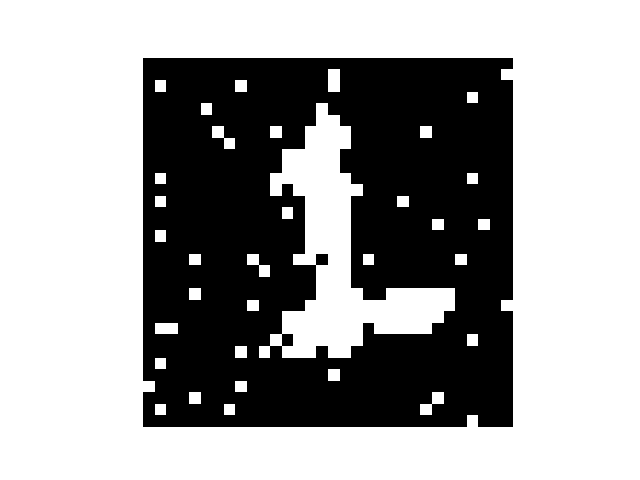

In [10]:
# Show the gif in the notebook
from IPython.display import Image
Image('recall30fps.gif')


## Plotting energy evolution in update



In [11]:
def plot_energy(energy):
    # change energy to be a list from np array
    # plot the energy
    plt.plot(np.array(energy).flatten())
    plt.xlabel('Iterations')
    plt.ylabel('Energy')
    plt.title('Energy of the network')

## Overlap Function

In order to measure the similarity between the current state $S(t)={S_i(t);1≤i≤N}$ and a pattern $μ$, we introduce the overlap

$$
 	
m^μ(t)=1/N∑_i p^μ_i S_i(t)
$$


The overlap takes a maximum value of $1$, if $S_i(t)=p^μ_i$, i.e., if the pattern is retrieved. It is close to zero if the current state has no correlation with pattern μ. The minimum value $m^μ(t)=−1$ is achieved if each neuron takes the opposite value to that desired in pattern μ.

In [12]:
def plot_overlap(pattern, retreived_pattern, overlap):
    
    #pattern = data_reshaped[1][0]

    pattern = data_reshaped[1][0]
    retreived_pattern, energy, overlap, frames = hopfield_network.recall(pattern.reshape(-1, 1), steps=100, 
                                                                         dimension=len(data[0]), bias=0.7, compute_energy=True)

    #compute overlap
    # flatten the pattern and the retreived pattern

    # plot overlap by time t
    plt.plot(overlap)
    plt.xlabel('Iterations')
    plt.ylabel('Overlap')

    plt.title('Overlap between the pattern and the retreived pattern')

Step number: 0
Step number: 1
Pattern converged after 1 steps


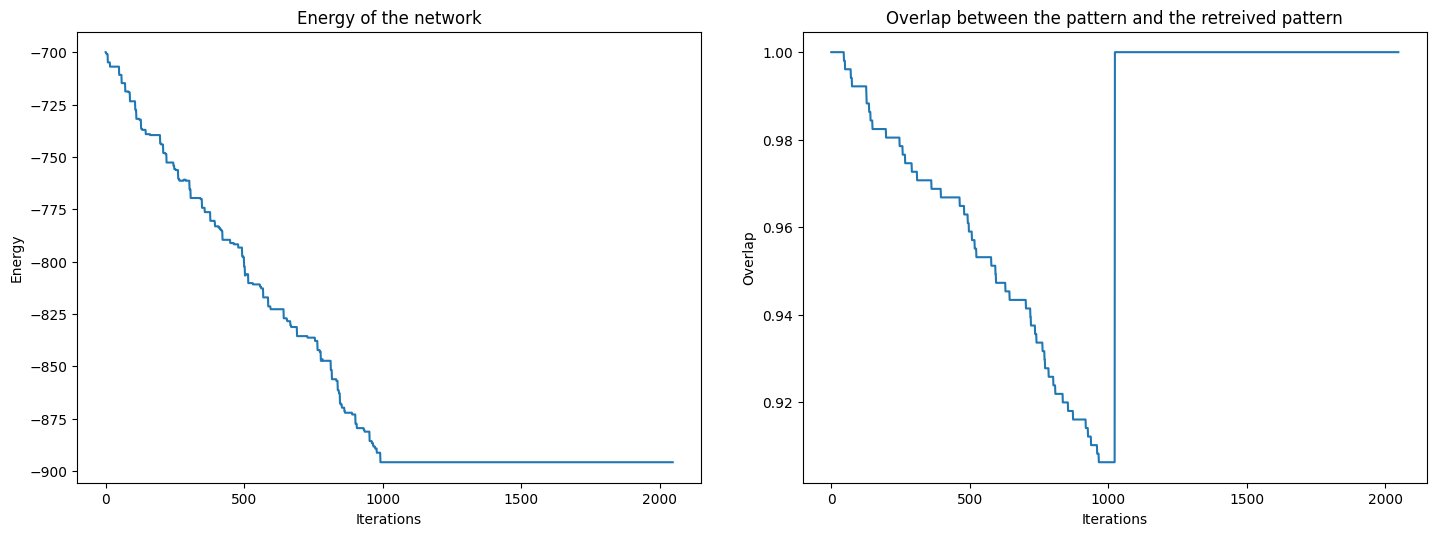

In [13]:
# Plot in subplots the energy and the overlap
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

plot_energy(energy)


plt.subplot(1, 2, 2)
plot_overlap(data_reshaped[1][0], recovered_random_pattern, overlap)

plt.tight_layout(pad=3)
plt.show()

